# **Chapter 2 - Individual Exercise 2 – Applying and Evaluating Supervised Learning Models**

**Simran Amesar** <br>
**Matriculation number - 100007050** <br>

### **Import Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### **Load the Dataset**

In [32]:
iris = load_iris()
X = iris.data
y = iris.target

X contains the feature matrix

y contains the categorical target labels

### **Train–Test Split**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

**Fit Scaler on Training Data**

In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Feature Scaling and Encoding

- No categorical encoding was required because all features were numerical
- Standardization was applied for the KNN classifier
- Tree-based models were trained on unscaled data since they are scale-invariant


### **Evaluation Function**

In [35]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1-score": f1_score(y_test, y_pred, average="macro")
    }


## **1. Tree-Based Models**

### **Decision Tree Classifier**

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_model(dt, X_test, y_test)


A Decision Tree splits data using feature-based rules. It is easy to interpret but prone to overfitting.

### **Random Forest Classifier**

In [37]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

rf_results = evaluate_model(rf, X_test, y_test)


Random Forest combines multiple decision trees to improve generalization and reduce variance.

### **Gradient Boosting Classifier**

In [38]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_results = evaluate_model(gb, X_test, y_test)


Gradient Boosting builds trees sequentially, correcting errors from previous models.

## **2. K-Nearest Neighbors (KNN)**

**Test Multiple Values of k**

In [39]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    accuracies.append(acc)

    print(f"k={k:2d} | Accuracy: {acc:.4f} | Precision: {prec:.4f} | "
          f"Recall: {rec:.4f} | F1: {f1:.4f}")



k= 1 | Accuracy: 0.9474 | Precision: 0.9556 | Recall: 0.9487 | F1: 0.9484
k= 2 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 3 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 4 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 5 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 6 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 7 | Accuracy: 0.9474 | Precision: 0.9556 | Recall: 0.9487 | F1: 0.9484
k= 8 | Accuracy: 0.9211 | Precision: 0.9375 | Recall: 0.9231 | F1: 0.9220
k= 9 | Accuracy: 0.9737 | Precision: 0.9762 | Recall: 0.9744 | F1: 0.9743
k=10 | Accuracy: 0.9737 | Precision: 0.9762 | Recall: 0.9744 | F1: 0.9743
k=11 | Accuracy: 0.9737 | Precision: 0.9762 | Recall: 0.9744 | F1: 0.9743
k=12 | Accuracy: 0.9737 | Precision: 0.9762 | Recall: 0.9744 | F1: 0.9743
k=13 | Accuracy: 0.9737 | Precision: 0.9762 | Recall: 0.9744 | F1: 0.9743
k=14 | Accuracy: 0.9474 | Precision: 0

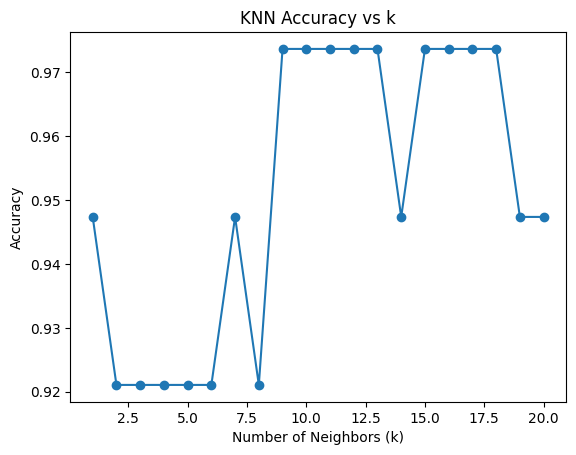

In [40]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()


**Train Final Model**

In [41]:
optimal_k = k_values[np.argmax(accuracies)]

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

knn_results = evaluate_model(knn, X_test_scaled, y_test)


# **3. Results Summary**

In [42]:
results_df = pd.DataFrame({
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    f"KNN (k={optimal_k})": knn_results
}).T

results_df


,Accuracy,Precision,Recall,F1-score
Decision Tree,0.894737,0.903030,0.897436,0.896825
Random Forest,0.921053,0.924603,0.923077,0.922963
Gradient Boosting,0.973684,0.976190,0.974359,0.974321
KNN (k=9),0.973684,0.976190,0.974359,0.974321


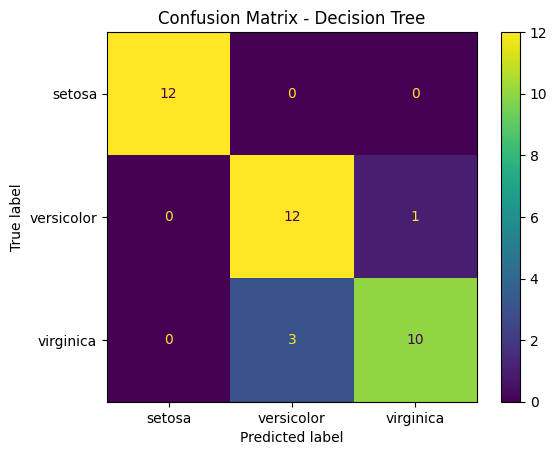

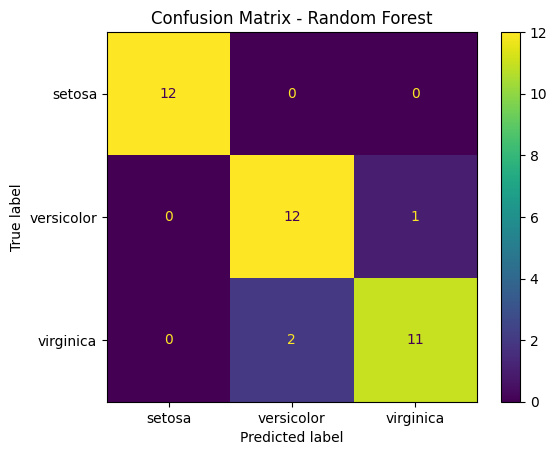

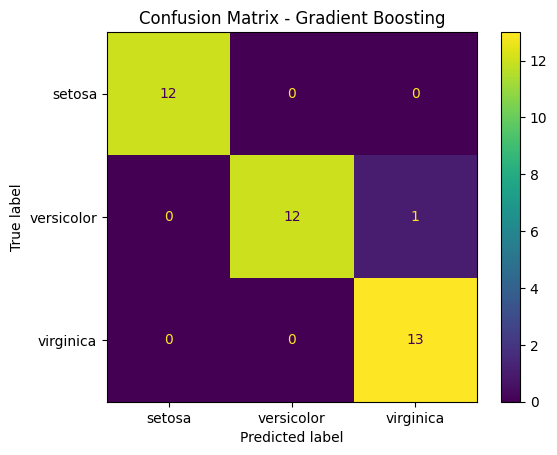

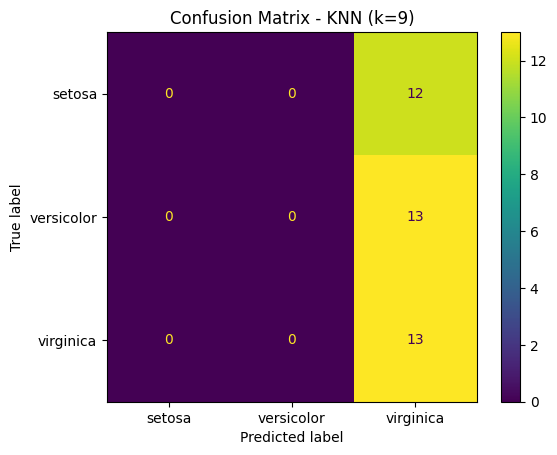

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    f"KNN (k={optimal_k})": knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=iris.target_names
    )
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


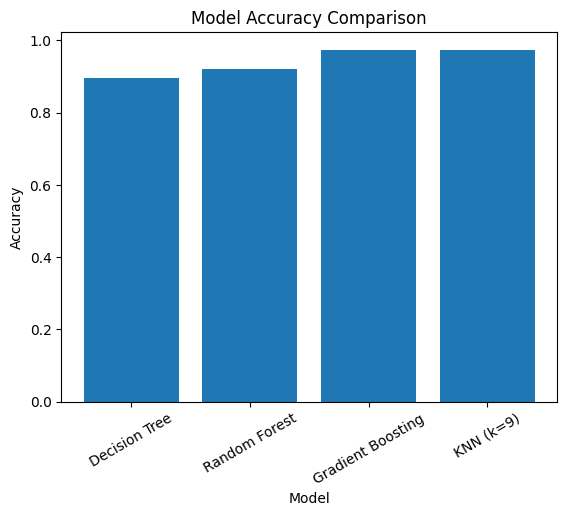

In [44]:
plt.figure()
plt.bar(results_df.index, results_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()


**Conclusion**

Gradient Boosting and KNN achieved the highest performance

Random Forest outperformed a single Decision Tree

KNN performance depends strongly on the choice of k